In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/titanic/train.csv')

In [3]:
# view top 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data.drop("Cabin",axis = 1, inplace=True)

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data["Survived"].count()

891

In [12]:
data["Survived"].sum()

342

In [13]:
891 - 342

549

In [14]:
df = data
df["Sex"]

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [ ]:
# groupby 
# replace 
# get_dummies


In [15]:
# groupby 

df.groupby("Sex")

In [16]:
df.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,312
male,577,577,577,577,453,577,577,577,577,577


In [21]:
df.groupby("Sex")["Survived"].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [19]:
df.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [23]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df.groupby("Embarked")["Survived"].sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [25]:
df.groupby("Embarked")["Survived"].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
pd.cut(df['Age'],bins=[0,12,18,30,60,80])

0      (18, 30]
1      (30, 60]
2      (18, 30]
3      (30, 60]
4      (30, 60]
5           NaN
6      (30, 60]
7       (0, 12]
8      (18, 30]
9      (12, 18]
10      (0, 12]
11     (30, 60]
12     (18, 30]
13     (30, 60]
14     (12, 18]
15     (30, 60]
16      (0, 12]
17          NaN
18     (30, 60]
19          NaN
20     (30, 60]
21     (30, 60]
22     (12, 18]
23     (18, 30]
24      (0, 12]
25     (30, 60]
26          NaN
27     (18, 30]
28          NaN
29          NaN
         ...   
861    (18, 30]
862    (30, 60]
863         NaN
864    (18, 30]
865    (30, 60]
866    (18, 30]
867    (30, 60]
868         NaN
869     (0, 12]
870    (18, 30]
871    (30, 60]
872    (30, 60]
873    (30, 60]
874    (18, 30]
875    (12, 18]
876    (18, 30]
877    (18, 30]
878         NaN
879    (30, 60]
880    (18, 30]
881    (30, 60]
882    (18, 30]
883    (18, 30]
884    (18, 30]
885    (30, 60]
886    (18, 30]
887    (18, 30]
888         NaN
889    (18, 30]
890    (30, 60]
Name: Age, Length: 891, 

In [30]:
df["is_children"] = df["Age"] < 18

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_children
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,True


In [32]:
df.groupby('is_children')["Survived"].sum()

is_children
False    281
True      61
Name: Survived, dtype: int64

In [33]:
df.groupby('is_children')["Survived"].count()

is_children
False    778
True     113
Name: Survived, dtype: int64

In [35]:
df["Fare"].sum()

28693.9493

In [36]:
df["Fare"].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [38]:
df.groupby(["Sex","is_children"])["Survived"].sum()

Sex     is_children
female  False          195
        True            38
male    False           86
        True            23
Name: Survived, dtype: int64

In [39]:
plot_data = df.groupby(["Sex","is_children"])["Survived"].sum()

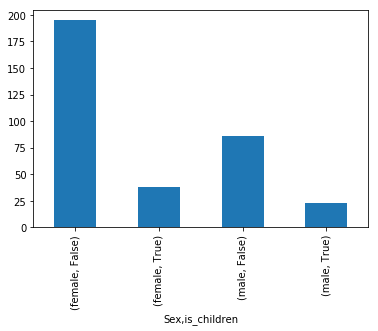

In [42]:
%matplotlib inline
plot_data.plot(kind="bar")

In [43]:
plot_data.unstack()

is_children,False,True
Sex,,
female,195,38
male,86,23


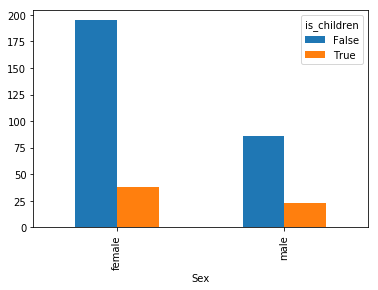

In [44]:
plot_data.unstack().plot(kind="bar")

In [46]:
plot_data.unstack(level=0)

Sex,female,male
is_children,,
False,195,86
True,38,23


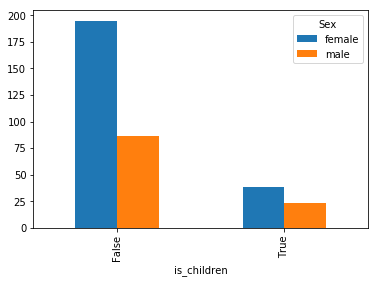

In [47]:
plot_data.unstack(level=0).plot(kind="bar")

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_children
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [50]:
df["Age_group"] = pd.cut(data["Age"],bins = [0,10,18,30,45,60,80])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_children,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,"(18, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,"(30, 45]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,"(18, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,"(30, 45]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,"(30, 45]"


In [52]:
df.groupby("Age_group")["Survived"].count()

Age_group
(0, 10]      64
(10, 18]     75
(18, 30]    270
(30, 45]    202
(45, 60]     81
(60, 80]     22
Name: Survived, dtype: int64

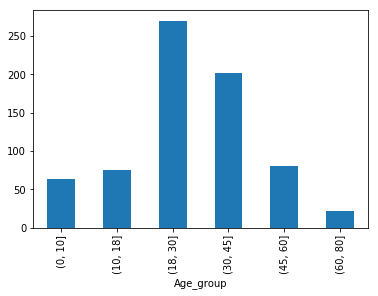

In [54]:
df.groupby("Age_group")["Survived"].count().plot(kind="bar")

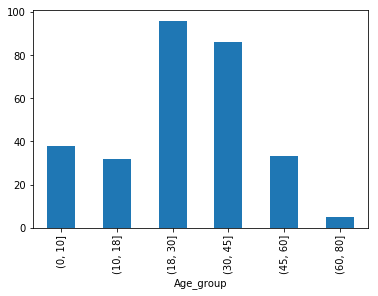

In [55]:
df.groupby("Age_group")["Survived"].sum().plot(kind="bar")

In [58]:
df.groupby(["Age_group","Survived"])["PassengerId"].count()

Age_group  Survived
(0, 10]    0            26
           1            38
(10, 18]   0            43
           1            32
(18, 30]   0           174
           1            96
(30, 45]   0           116
           1            86
(45, 60]   0            48
           1            33
(60, 80]   0            17
           1             5
Name: PassengerId, dtype: int64

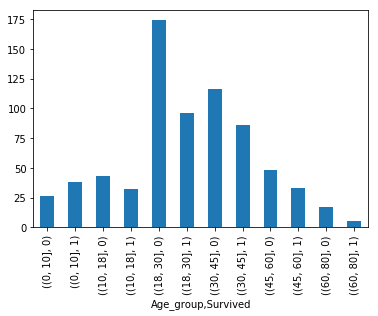

In [59]:
df.groupby(["Age_group","Survived"])["PassengerId"].count().plot(kind="bar")

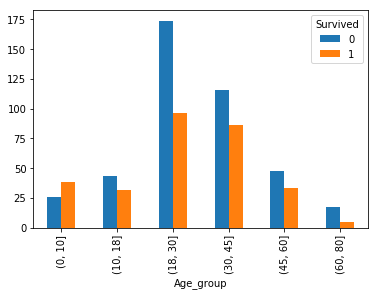

In [60]:
df.groupby(["Age_group","Survived"])["PassengerId"].count().unstack().plot(kind="bar")

In [72]:
from random import randint
df["chipcolum"] =  "$" + str(randint(100,1000))

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_children,Age_group,chipcolum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,"(18, 30]",$863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,"(30, 45]",$863
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,"(18, 30]",$863
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,"(30, 45]",$863
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,"(30, 45]",$863


In [74]:
# pandas apply fucction

def remove_dollar(value):
    print(value)
    return float(value[1:])

remove_dollar("$234")

$234


234.0

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [82]:
def whoami(value):
    if value["Age"] < 18 and value["Sex"] == "male":
        return "male_child"
    elif value["Age"] < 18 and value["Sex"] == "female":
        return "female_child"
    elif value["Age"] > 18 and value["Sex"] == "female":
        return "female_adult"
    else:
        return "Male_adult"
    
df.apply(whoami,axis=1)

0        Male_adult
1      female_adult
2      female_adult
3      female_adult
4        Male_adult
5        Male_adult
6        Male_adult
7        male_child
8      female_adult
9      female_child
10     female_child
11     female_adult
12       Male_adult
13       Male_adult
14     female_child
15     female_adult
16       male_child
17       Male_adult
18     female_adult
19       Male_adult
20       Male_adult
21       Male_adult
22     female_child
23       Male_adult
24     female_child
25     female_adult
26       Male_adult
27       Male_adult
28       Male_adult
29       Male_adult
           ...     
861      Male_adult
862    female_adult
863      Male_adult
864      Male_adult
865    female_adult
866    female_adult
867      Male_adult
868      Male_adult
869      male_child
870      Male_adult
871    female_adult
872      Male_adult
873      Male_adult
874    female_adult
875    female_child
876      Male_adult
877      Male_adult
878      Male_adult
879    female_adult
